<a href="https://colab.research.google.com/github/maryline321/datascience/blob/main/Iris_Flower_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:importing the libraries

In [ ]:

import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Step 2:importing the dataset

In [ ]:

data=pandas.read_csv("Iris (2).csv1.csv")
data

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#checking if there is any inconsistency in the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#check for null values in the dataset before we process it.
data.isnull().sum()

Id             0
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [ ]:
#dropping the Id column as it is unecessary column
#axis=1 specifies that it should be column wise
#inplace =1 means the changes should be reflected into the dataframe

data.drop('Id',axis=1,inplace=True)

In [ ]:
data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

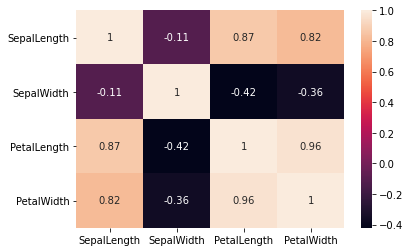

In [ ]:

sbn.heatmap(data.corr(), annot=True)

In [ ]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='Species', ylabel='SepalWidth'>

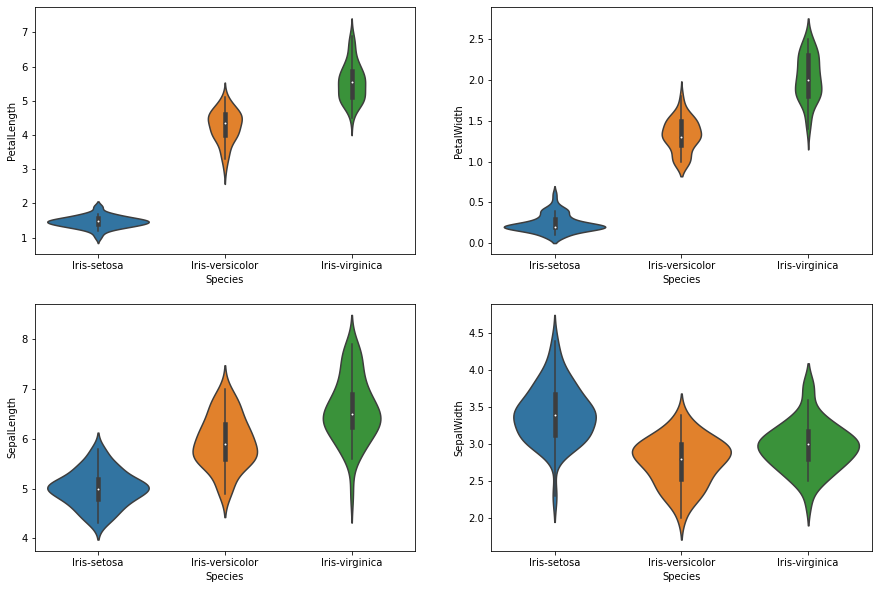

In [ ]:
#visualize the data

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLength',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidth',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLength',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidth',data=data)


In [ ]:
#step 3:Convert data into an array

array = data.values

# Now split data into features - X , label - Y

X  = array[:, 0:4]   # 4 is the class. Its not counted here, there is a -1
Y =  array[:, 4]   # 4 is counted here, target.



#step 4:Split the data into 70% of data for training, 30% of data for testing

from sklearn import model_selection
X_train, X_test, Y_train, Y_test  = model_selection.train_test_split(X, Y, test_size = 0.3, 
                                                                     random_state = 42)

In [ ]:
# Step 5: Modeling : Training

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Load your training data to any of these models
#we implement GuassianNB

model = GaussianNB()
model.fit(X_train, Y_train)
print('Model Learning only with 70% of Data')
print('The 30% of data was not used for training, it will be used for testing!')



# Step 6: Testing and Evaluate
predictions = model.predict(X_test)

print('Real Answers' , Y_test)
print('Model Predcited ', predictions)



# Step 7: Evaluate
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(Y_test, predictions) * 100)

from sklearn.metrics import classification_report
print('Report: ', classification_report(Y_test, predictions))

from sklearn.metrics import confusion_matrix
print("Matrix:",confusion_matrix(Y_test, predictions))




# Step 8: Deployment - Retrain the model if performance is < 75%
sepallength = float(input('Enter Sepal Length:'))
sepalwidth = float(input('Enter Sepal Width:'))
petallength = float(input('Enter Petal Length:'))
petalwidth = float(input('Enter Petal Width:'))

newflower = [[sepallength, sepalwidth, petallength, petalwidth]]
outcome = model.predict(newflower)
print(outcome)

Model Learning only with 70% of Data
The 30% of data was not used for training, it will be used for testing!
Real Answers ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']
Model Predcited  ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-vir